### Scatterplot
A scatterplot is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

To quantify how strong the correlation is between the variables, we use a correlation coefficient. Pearson correlation coefficient (r) captures linear relationships. It is a value ranging from -1 to +1. A positive value of r indicates the increase in one variable tends to increase another variable. On the other hand, a negative r means the increase in one variable tends to cause a decrease in another variable. A value close to 0 indicates a weak correlation, and a value close to -1 and +1 indicates a strong correlation.

**matplotlib.pyplot.scatter()**

One basic way of creating a scatterplot is through Matplotlib's scatter function:

Example 1 a. Scatter plot showing a negative correlation between two variables

The data set [link](https://video.udacity-data.com/topher/2020/October/5f85c372_fuel-econ/fuel-econ.csv).

In [ ]:
# Import pandas, matplotlib and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(3)



,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


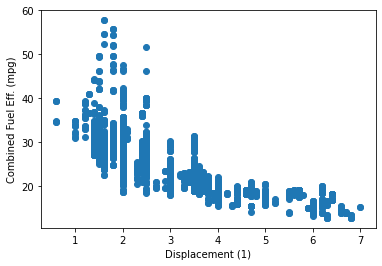

In [ ]:
# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Observation**
>* In the example above, the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

#### Alternative Approach - seaborn.regplot()
Seaborn's regplot() function combines scatterplot creation with regression function fitting:
The basic function parameters, "data", "x", and "y" are the same for regplot as they are for matplotlib's scatter.

##### Example 1 b. Scatter plot showing negative correlation between two variables

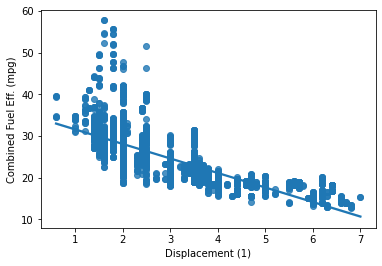

In [ ]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Observation**
>* The regression line in a scatter plot showing a negative correlation between the two variables.

##### Example 2. Scatter plot showing a positive correlation between two variables
Let's consider another plot shown below that shows a positive correlation between two variables.

In [ ]:
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


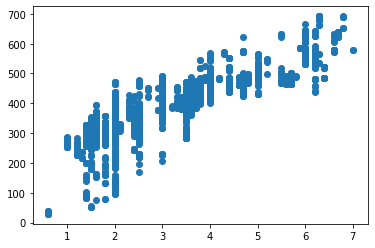

In [ ]:
plt.scatter(data = fuel_econ, x='displ', y='co2');

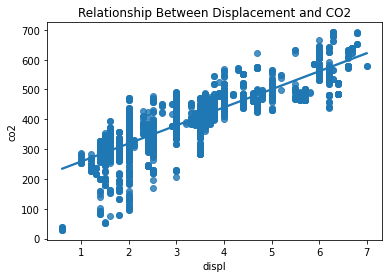

In [ ]:
sb.regplot(data = fuel_econ, x='displ', y='co2')
plt.title('Relationship Between Displacement and CO2');

**Observation**
The regression line in a scatter plot showing a positive correlation between the two variables.


In the scatter plot above, by default, the regression function is linear and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a \text{log}(y) \propto xlog(y)∝x relationship (that is, linear increases in the value of x are associated with linear increases in the log of y), plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set fit_reg = False in the regplot function call.

You can even plot the regression line on the transformed data as shown in the example below. For transformation, use a similar approach as you've learned in the last lesson.

#### Example 3. Plot the regression line on the transformed data

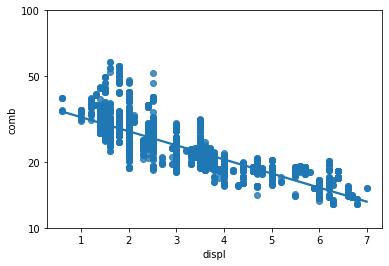

In [ ]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(x = fuel_econ['displ'], y = fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

### Overplotting, Transparency, and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Let's see an example below for each Jitter to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's scatter() function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function if made.

**Note:**
>* Incase of overplotting, get more info from this [link](https://www.youtube.com/watch?v=BGqR-nxgMtg).

### Example 1. Jitter - Randomly add/subtract a small value to each data point

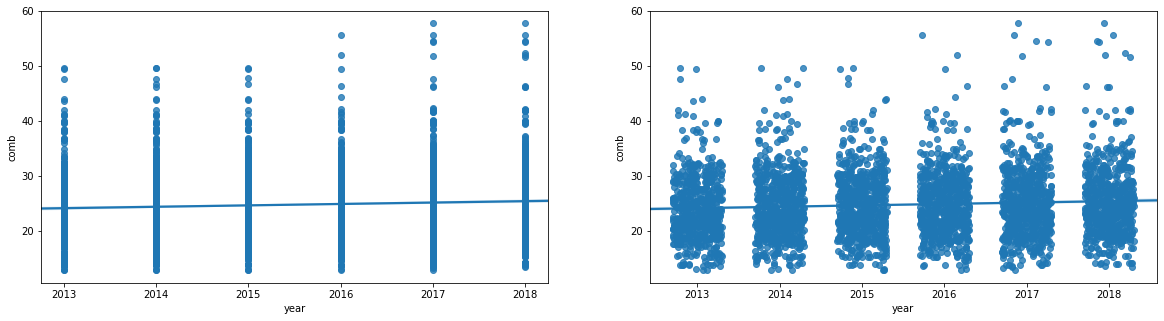

In [ ]:
##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

**Observation**
>* The scatter plot on left showing a simple scatter plot, while the right one presents with jitter.

In the left scatter plot above, the degree of variability in the data and strength of the relationship is fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. The right scatter plot has a jitter introduced to the data points.

You can add transparency to either ```scatter()``` or ```regplot()``` by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). See the example below.

#### Example 2. Plot with both Jitter and Transparency

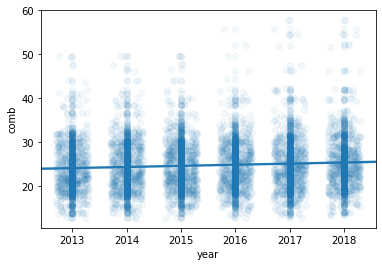

In [ ]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

**Observation**
>* In the plot above, the jitter settings will cause each point to be plotted in a uniform ±0.3 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter

### Heat Maps
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d() function.

**Heat maps are useful in the following cases:**

To represent a plot for discrete vs. another discrete variable
As an alternative to transparency when the data points are enormous

#### Example 1. Default heat plot using Matplotlib.pyplot.hist2d() function

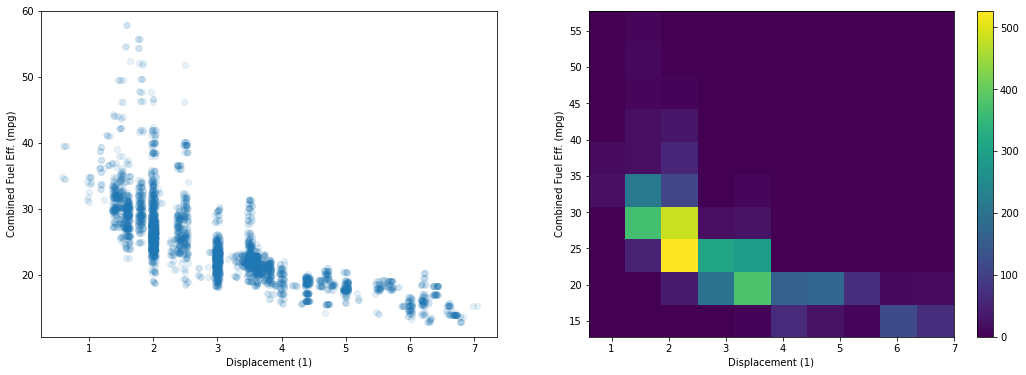

In [ ]:
# Plot a heatmap fpr Displacement and Combined Fuel Effeciency
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Additional Variations
To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

#### Example 2. Heat plot - Set a minimum bound on counts and a reverse color map

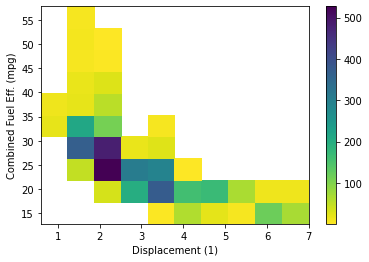

In [ ]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Observation**
>* As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow

### Example 3. Heat plot - Specify bin edges

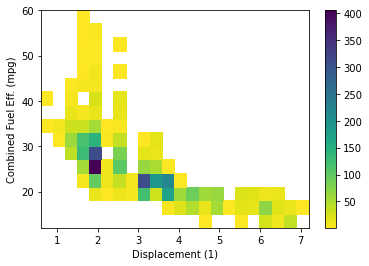

In [ ]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.


Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

### Annotations on each cell
If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

#### Example 4. Add text annotation on each cell using pyplot.text() function

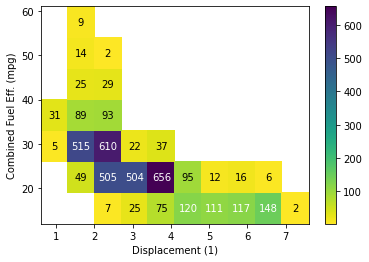

In [ ]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves.

You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap() function that is built for categorical heatmaps, as will be seen later.

### Violin Plots
There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates. Seaborn's [violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function can be used to create violin plots.

#### Example 1. Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class). [Explanation link](https://youtu.be/f8Kh4PByiEA) for the below code:

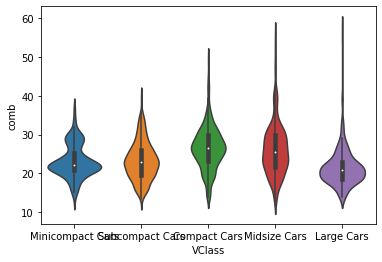

In [ ]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sb.violinplot(data=fuel_econ, x='VClass', y='comb');

**Observation**
>* You can see that each level has been rendered in a different color, like how the plain ```countplot()``` was in the previous lesson. We can set the "color" parameter to make each curve the same color if it is not meaningful.

Inside each curve, there is a black shape with a white dot inside, a miniature box plot. A further discussion of box plots will be performed later on. If you'd like to remove the box plot, you can set the ```inner = None``` parameter in the violinplot call to simplify the look of the final visualization.

### Example 2. Violin plot without datapoints in the violin interior

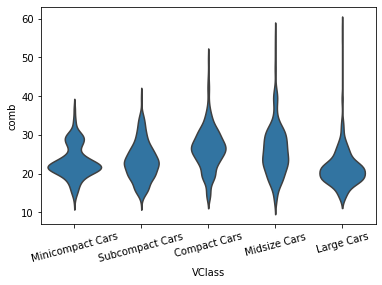

In [ ]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);

**Additional Variation**

Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

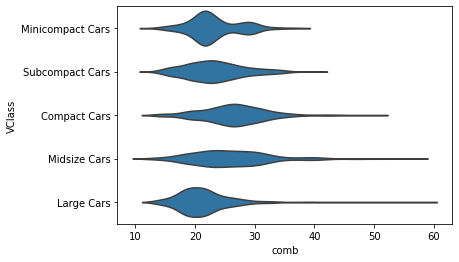

In [ ]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

### Box Plots

A box plot can also be used to show the relationship between a numeric variable and a categorical variable. In a box, the central line indicates the median, the upper and lower edges show the 1st and 3rd quartiles. Whiskers outside of the box indicate the largest and smallest values. Box plots also have outliers plotted as points.

Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function.

#### Example 1. Violin versus Box plot

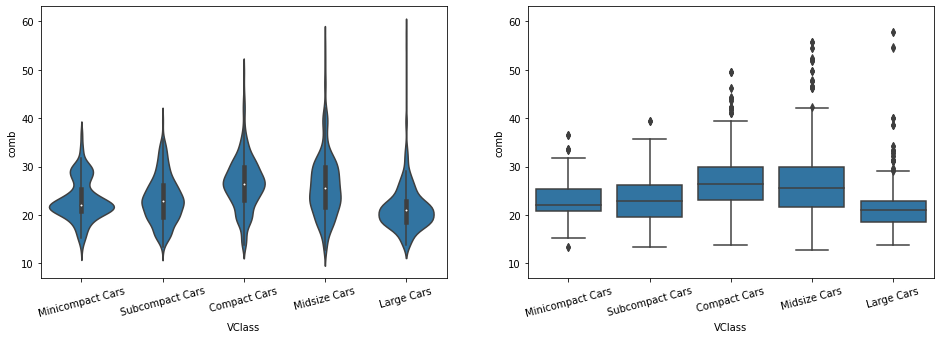

In [ ]:
# Step 1. Import packages

# Step 2. Load data

# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

Note that the "color" parameter is being used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot() is assigned to a variable, ax1 is used to programmatically obtain those limit values.

Documentation: [Axes objects](https://matplotlib.org/api/axes_api.html)

#### Comparison Between Violind and Boxplots
The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the "Large Cars" group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the "Minicompact Cars" values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

**Additional Variations**

As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

#### Example 2. Horizontal box plot

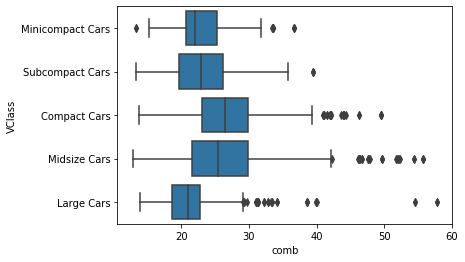

In [ ]:
sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color)

In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

#### Example 3. Violin plot with quartile information in the middle

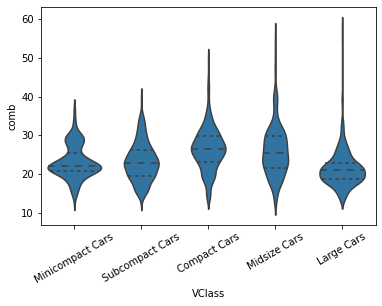

In [ ]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

### Creating a Function for the Violin Plot

In [ ]:
def violinbox_solution_1():
    # data setup
    #fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else: # pre-v0.21
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,categories = sedan_classes)
    # plotting
    base_color = sb.color_palette()[0]
    sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ',
                  color = base_color)
    plt.xticks(rotation = 15)



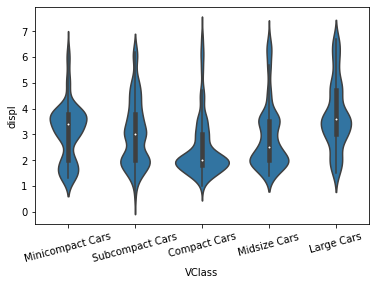

In [ ]:
violinbox_solution_1()

#### Clustered Bar Chart

We can use clustered bar charts to show the relationship between two qualitative variables. However, to do this, we may need to process the second variable a little so it can be shown as a quantitative value along the y-axis. For example, you can count the frequency of the second variable. Also, you may also apply a color or texture encoding to distinguish the level of the second variable.

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

#### Example 1. Plot a Bar chart between two qualitative variables

**Preparatory Step 1** - Convert the "VClass" column from a plain object type into an ordered categorical type

In [ ]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

**Preparatory Step 2** - Add a new column for transmission type - Automatic or Manual

In [ ]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic


In [ ]:
fuel_econ['trans_type_2'] = fuel_econ['trans'].apply(lambda x:x.split()[1])
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type,trans_type_2
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic,(AM6)
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic,(AM-S6)


In [ ]:
fuel_econ['trans_type_2'].unique()

array(['(AM6)', '(AM-S6)', '(S6)', '8-spd', '6-spd', '(S5)', '7-spd',
       '(AV-S6)', '(S8)', '(AM-S7)', '(S7)', '(variable', '5-spd',
       '(AV-S8)', '4-spd', '(AM7)', '(AV-S7)', '9-spd', '(AM-S8)', '(A1)',
       '(AM8)', '(S9)', '(S10)', '(AV-S10)'], dtype=object)

**Step 3. Plot the bar chart**

Bar chart between two qualitative variables, and one of them is ordered.

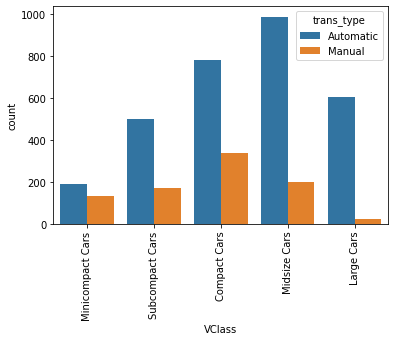

In [ ]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation=90);

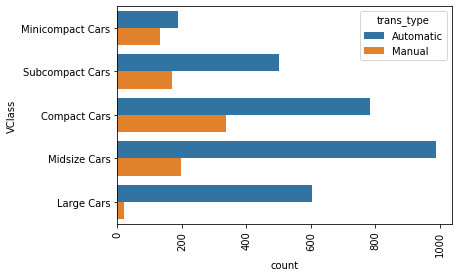

In [ ]:
sb.countplot(data = fuel_econ, y = 'VClass', hue = 'trans_type')
plt.xticks(rotation=90);

### Alternative Approach
#### Example 2. Plot a Heat Map between two qualitative variables
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

**Step 1** - Get the data into desirable format - a DataFrame

In [ ]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()

In [ ]:
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [ ]:
# Convert ct_counts into a dataframe by using reset_index and set name = 'counts
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [ ]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


**Note:**
>* Documentation: [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) ```reset_index```, [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) ```pivot```

**Step 2** - Plot the heatmap

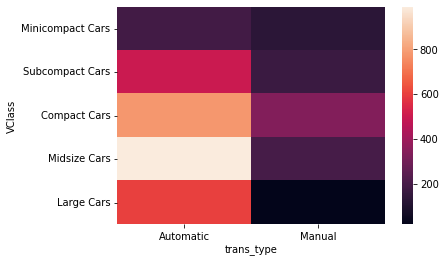

In [ ]:
sb.heatmap(ct_counts);

**Obseravtion**
>* The heat map tells the same story as the clustered bar chart.

**Example 3** - Additional Variation


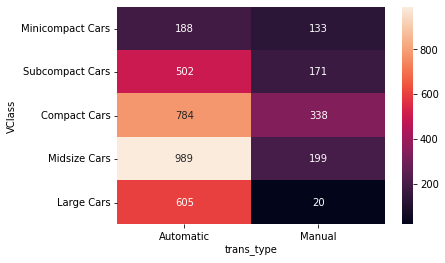

In [ ]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');


```annot = True``` makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding ```fmt = 'd'``` means that annotations will all be formatted as integers instead. You can use ```fmt = '.0f'``` if you have any cells with no counts, in order to account for NaNs.

In [ ]:
def categorical_solution_1():
  # data setup
  fuel_econ = pd.read_csv('fuel-econ.csv')
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
  else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,categories = sedan_classes)
  fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
  plt.figure(figsize=[10,5])
  # plotting
  ax = sb.countplot(data = fuel_econ_sub, y = 'VClass', hue = 'fuelType')
  ax.legend(loc = 1, framealpha = 1) # lower right, no transparency
  plt.xticks(rotation = 90)

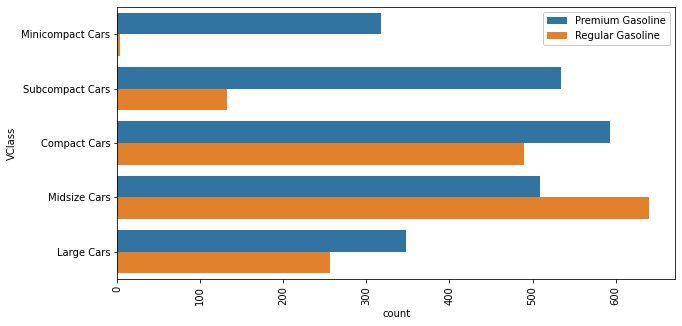

In [ ]:
categorical_solution_1()

### Faceting

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in the example). Then we use the ```map``` method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

**Example 1.**

In the ```map``` call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like ```x = "comb"```, or the mapping won't work properly.

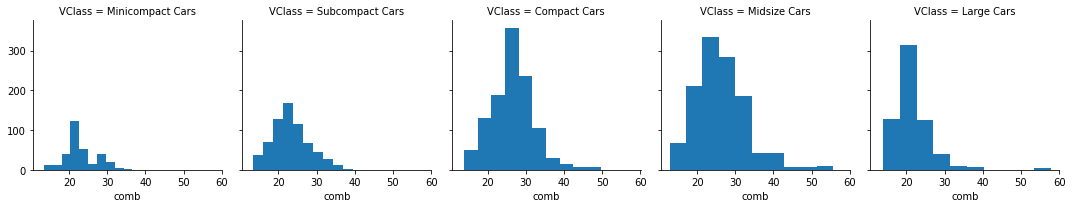

In [ ]:
# Preparatory Step
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb");

**Note:**
>* Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

**Example 2**

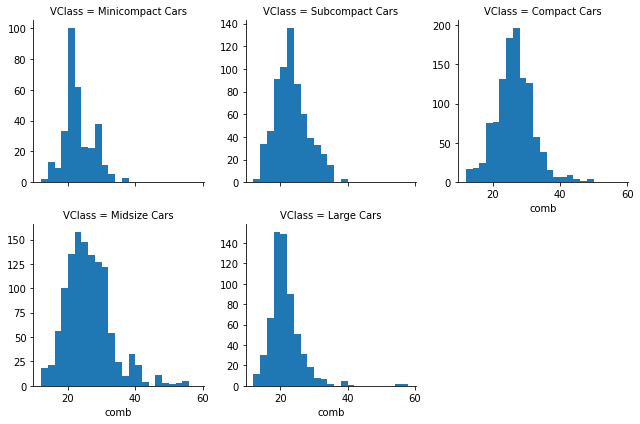

In [ ]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

#### Additional Variation
If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting ```col_wrap = 7``` means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

**Example 3**

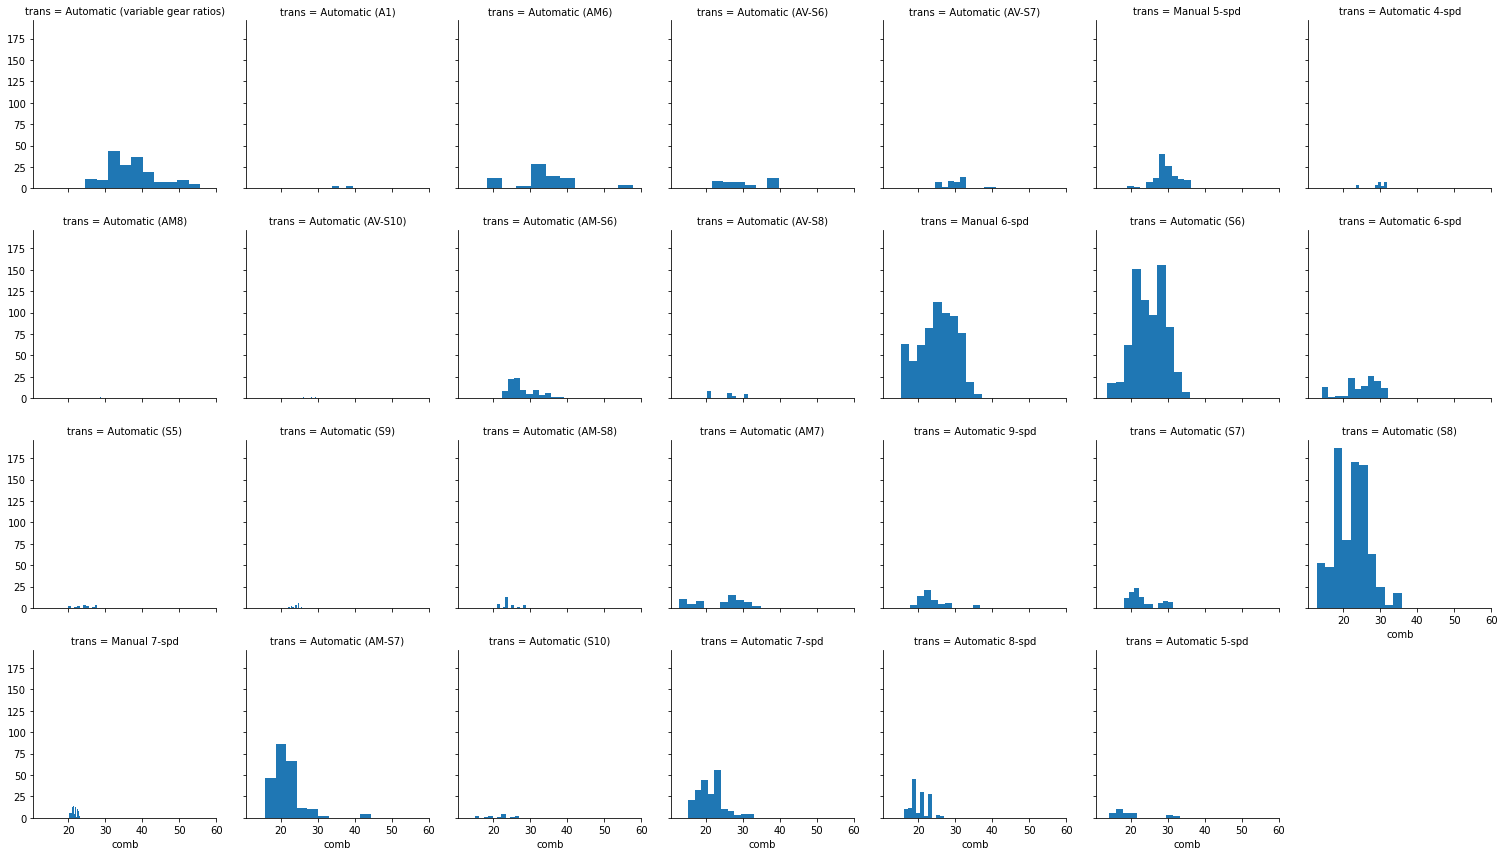

In [ ]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_means

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index
group_order

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb');

**Observation**
>* From the above, it is noted that the count on the y axis is same across all the graphs. To change this, set the ```sharey=False``` on the ```FacetGrid()``` function so that each graph has it's own count values on the y axis as shown below:

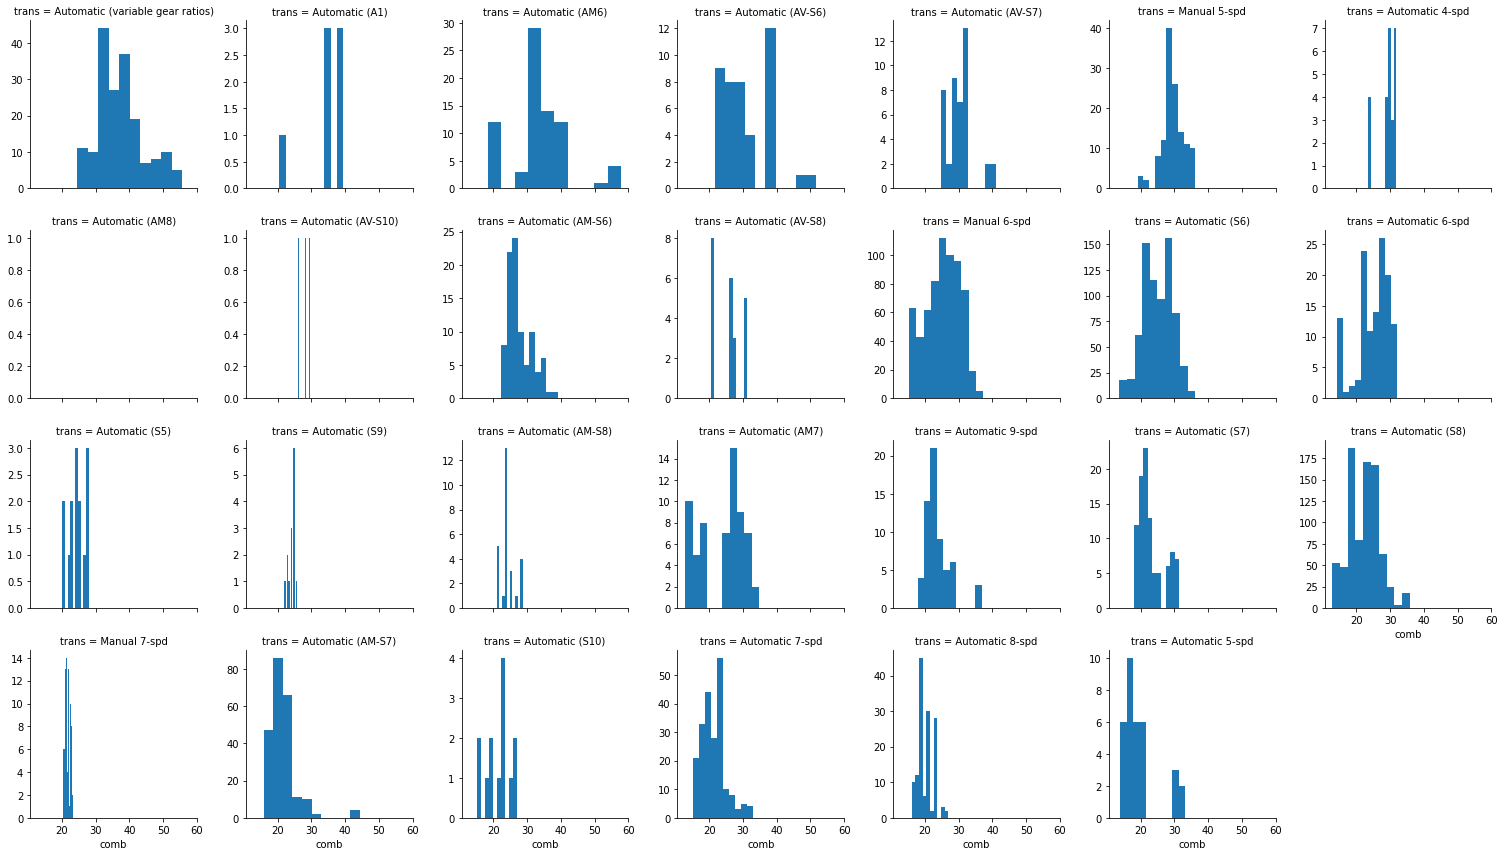

In [ ]:
# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order, sharey=False)
g.map(plt.hist, 'comb');

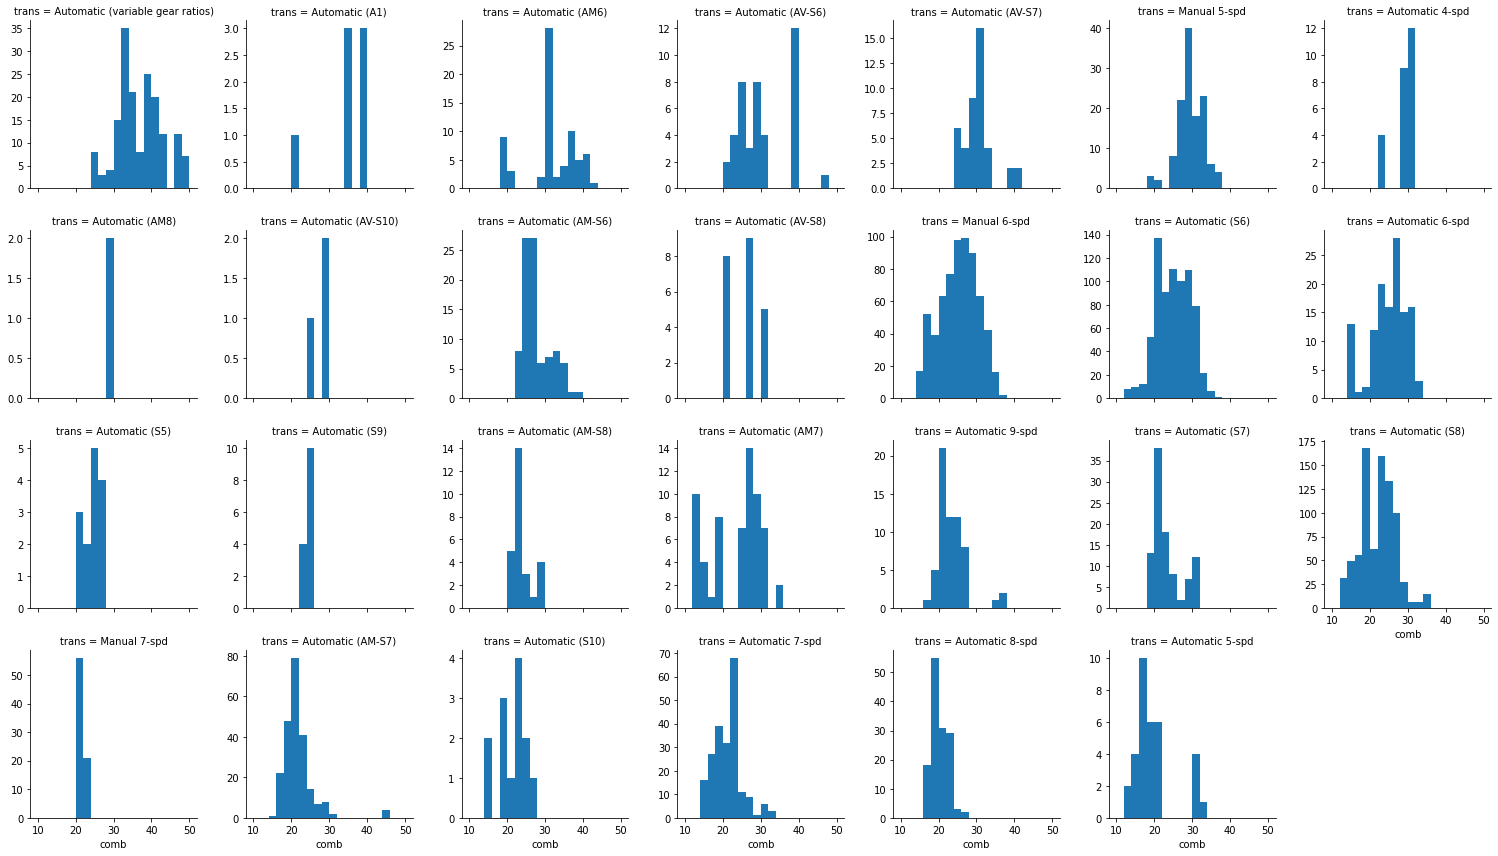

In [ ]:
bins = np.arange(10, 50+2, 2)
# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order, sharey=False)
g.map(plt.hist, 'comb', bins=bins);

#### Adapted Bar Charts
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's ```barplot``` function:

**Example 1**

Different hues are automatically assigned to each category level unless a fixed color is set in the "color" parameter, like in countplot and violinplot.

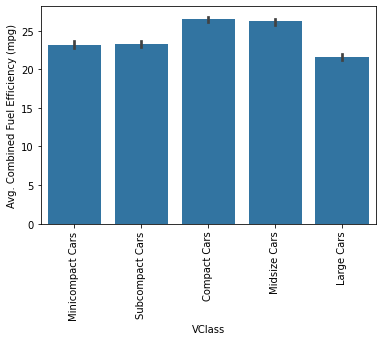

In [ ]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=90);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

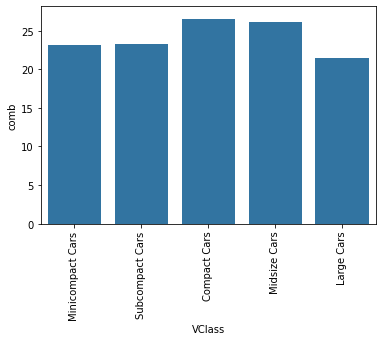

In [ ]:
# Removing the ticks on the bars. Set errwidth=0
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=90);


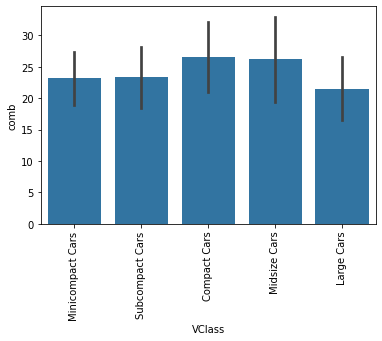

In [ ]:
# Change the bar plot to represent standard deviation
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=90);

As an alternative, the pointplot() function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

**Example 2.**

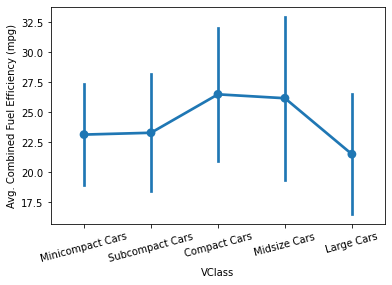

In [ ]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

For nominal data types, the ```linestyles``` is set to ```" "``` as shown below:

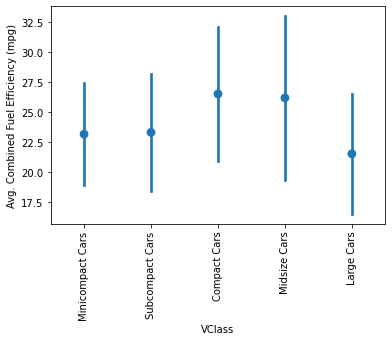

In [ ]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=90)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

**Example 3.** Bringing a few charts together

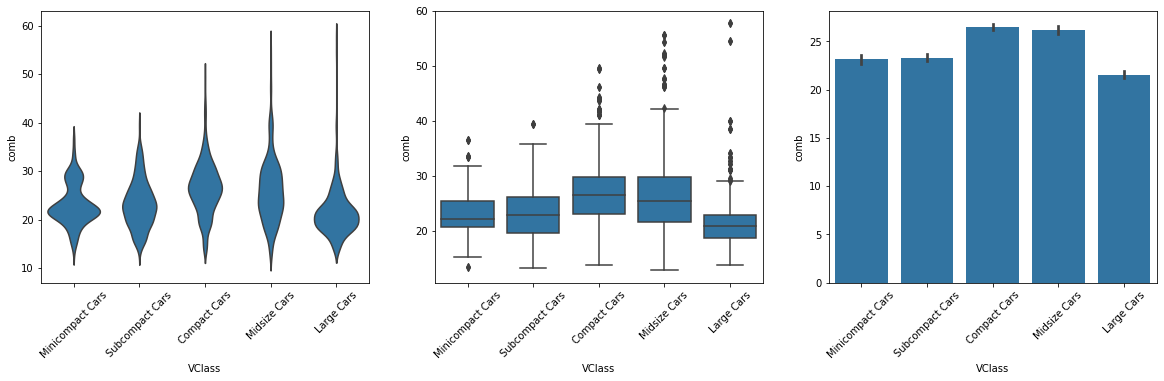

In [ ]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

**Note**
>* Matplotlib's hist() function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" argument.

##### Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against the values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's [errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function, performing some processing on the data in order to get it into its necessary form.

Let's see some examples below with video explanation available [here](https://youtu.be/Z7NjwA6jbjU):

**Example 1**

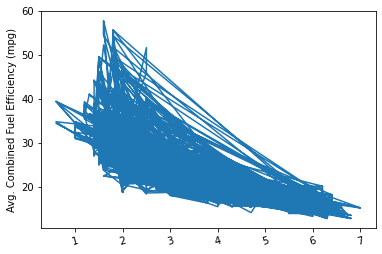

In [ ]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

**Observation**
>* If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

**Example 2**

In [ ]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] < ... <
                                            (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

A series object returned when the ```fuel_econ['displ']``` column passed to the ```pandas.cut()``` function

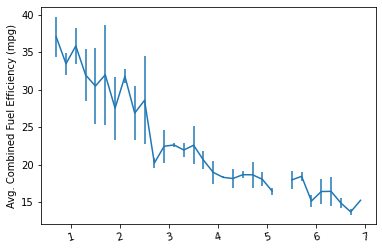

In [ ]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

Documentation: Refer to the [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function syntax.

#### Alternate Variations
Note about the DataFrame object used in the examples below
The visualizations below are based on a synthetic dataframe object df, and show the plots based on its numeric (quantitative) variables, ```num_var1```, ```num_var2```, and a categorical (qualitative) variable, ```cat_var```. The new dataframe has been chosen to reflect the additional relationship between the selected variables.

Instead of computing summary statistics on fixed bins, you can also make computations on a rolling window through use of pandas' ```rolling``` method. Since the rolling window will make computations on sequential rows of the dataframe, we should use ```sort_values``` to put the x-values in ascending order first.

**Example**

In [ ]:
fuel_econ.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore', 'trans_type',
       'trans_type_2'],
      dtype='object')

Note that we're also not limited to just one line when plotting. When multiple Matplotlib functions are called one after the other, all of them will be plotted on the same axes. Instead of plotting the mean and error bars, we will plot the three central quartiles, laid on top of the scatterplot.

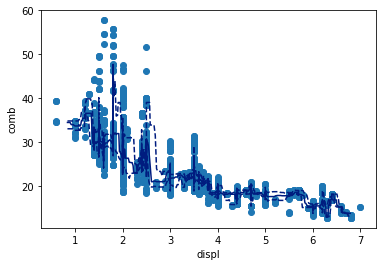

In [ ]:
# compute statistics in a rolling window
df_window = fuel_econ.sort_values('displ').rolling(15)
x_winmean = df_window.mean()['displ']
y_median = df_window.median()['comb']
y_q1 = df_window.quantile(.25)['comb']
y_q3 = df_window.quantile(.75)['comb']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('displ')
plt.ylabel('comb');

**Example 4**

Another bivariate application of line plots is to plot the distribution of a numeric variable for different levels of a categorical variable. This is another alternative to using violin plots, box plots, and faceted histograms. With the line plot, one line is plotted for each category level, like overlapping the histograms on top of one another. This can be accomplished through multiple ```errorbar``` calls using the methods above, or by performing multiple ```hist``` calls, setting the ```"histtype = step"``` parameter so that the bars are depicted as unfilled lines.

In [ ]:
fuel_econ.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


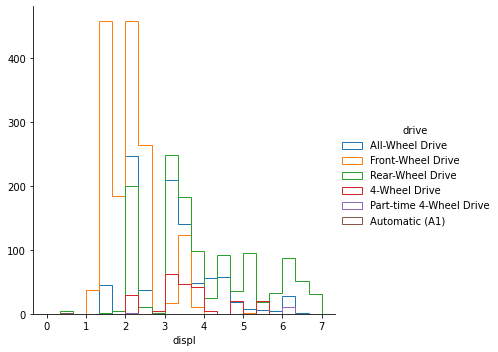

In [ ]:
bin_edges = np.arange(0, fuel_econ['displ'].max()+1/3, 1/3)
g = sb.FacetGrid(data = fuel_econ, hue = 'drive', height = 5)
g.map(plt.hist, "displ", bins = bin_edges, histtype = 'step')
g.add_legend();

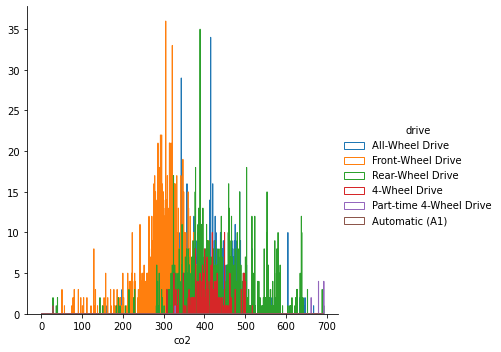

In [ ]:
bin_edges = np.arange(0, fuel_econ['co2'].max()+1/3, 1/3)
g = sb.FacetGrid(data = fuel_econ, hue = 'drive', height = 5)
g.map(plt.hist, "co2", bins = bin_edges, histtype = 'step')
g.add_legend();

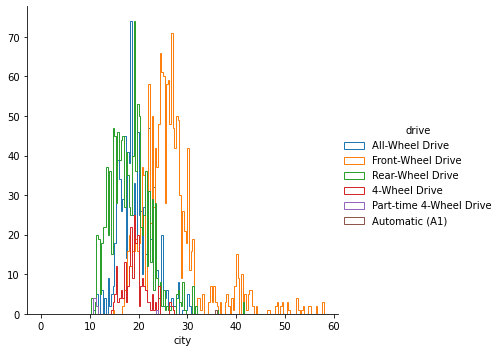

In [ ]:
bin_edges = np.arange(0, fuel_econ['city'].max()+1/3, 1/3)
g = sb.FacetGrid(data = fuel_econ, hue = 'drive', height = 5)
g.map(plt.hist, "city", bins = bin_edges, histtype = 'step')
g.add_legend();

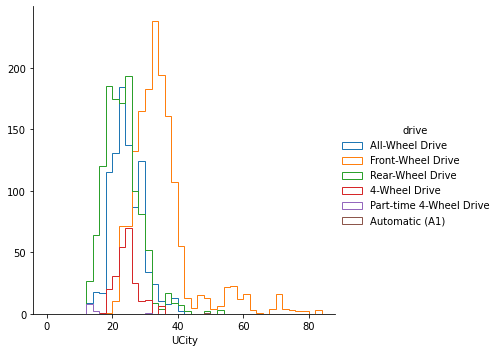

In [ ]:
bin_edges = np.arange(0, fuel_econ['UCity'].max()+2, 2)
g = sb.FacetGrid(data = fuel_econ, hue = 'drive', height = 5)
g.map(plt.hist, "UCity", bins = bin_edges, histtype = 'step')
g.add_legend();

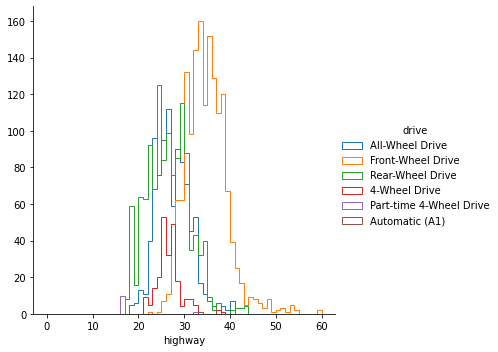

In [ ]:
bin_edges = np.arange(0, fuel_econ['highway'].max()+1, 1)
g = sb.FacetGrid(data = fuel_econ, hue = 'drive', height = 5)
g.map(plt.hist, "highway", bins = bin_edges, histtype = 'step')
g.add_legend();

**Observation**

Unfortunately, the "Alpha" curve seems to be pretty lost behind the other three curves since the relatively low number of counts is causing a lot of overlap. Perhaps connecting the centers of the bars with a line, like what was seen in the first errorbar example, would be better.

Functions you provide to the map method of FacetGrid objects do not need to be built-ins. Below, I've written a function to perform the summarization operations seen above to plot an errorbar line for each level of the categorical variable, then fed that function (freq_poly) to map.

**Example 5**

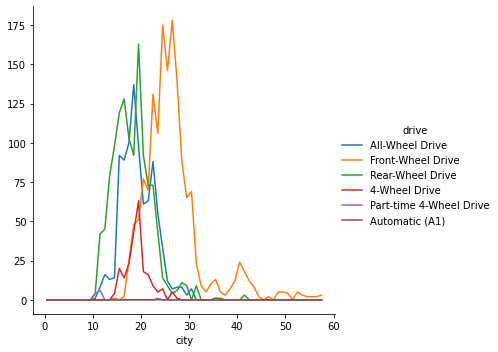

In [ ]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(0, fuel_econ['city'].max()+1, 1)
g = sb.FacetGrid(data = fuel_econ, hue = 'drive', height = 5)
g.map(freq_poly, "city", bins = bin_edges)
g.add_legend();

**Note**

>* **kwargs is used to allow additional keyword arguments to be set for the errorbar function.

**Documentation:** [numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) linspace.

#### Other Adaptations of Bivariate Plots
You also saw one other way of expanding univariate plots into bivariate plots in the previous lesson: substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

If we want to depict the mean of a third variable in a 2-d histogram, we need to change the weights of points in the hist2d function similar to how we changed the weights in the 1-d histogram.

In [ ]:
xbin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)

# count number of points in each bin
xbin_idxs = pd.cut(df['num_var1'], xbin_edges, right = False,
                    include_lowest = False, labels = False).astype(int)
ybin_idxs = pd.cut(df['num_var2'], ybin_edges, right = False,
                    include_lowest = False, labels = False).astype(int)

pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'num_var1', columns = 'num_var2').values

z_wts = df['num_var3'] / pts_per_bin[xbin_idxs, ybin_idxs]

# plot the data using the calculated weights
plt.hist2d(data = df, x = 'num_var1', y = 'num_var2', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('num_var1')
plt.ylabel('num_var2');
plt.colorbar(label = 'mean(num_var3)');

Considering how few data points there are in the example, and how cleanly the third variable is distributed, the adapted heat map is a bit excessive in terms of work. The low level of point overlap observed earlier means that the scatterplot with color or size encoding was sufficient for depicting the data. You'll be more likely to use the heat map if there is a lot of data to be aggregated.

The code for the 2-d bar chart doesn't actually change much. The actual heatmap call is still the same, only the aggregation of values changes. Instead of taking size after the groupby operation, we compute the mean across dataframe columns and isolate the column of interest.

In [ ]:
cat_means = df.groupby(['cat_var1', 'cat_var2']).mean()['num_var2']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'cat_var2', columns = 'cat_var1',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'})

Note how the "cbar_kws" provides an additional argument to the colorbar component of the heat map call.

An alternative approach for two categorical variables and one numeric variable is to adapt a clustered bar chart using the barplot function instead of the countplot function:

In [ ]:
ax = sb.barplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

The "hue" parameter can also be used in a similar fashion in the boxplot, violinplot, and pointplot functions to add a categorical third variable to those plots in a clustered fashion. As a special note for pointplot, the default rendering aligns all levels of the "hue" categorical variable vertically. Use the "dodge" parameter to shift the levels in a clustered fashion:

In [ ]:
ax = sb.pointplot(data = df, x = 'cat_var1', y = 'num_var2', hue = 'cat_var2',
                  dodge = 0.3, linestyles = "")

As a final example, a line plot can be adapted from previous code showing how to create frequency polygons for levels of a categorical variable. In this case as well, we create a custom function to send to a FacetGrid object's map function that computes the means in each bin, then plots them as lines via errorbar.

In [ ]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'cat_var2', size = 5)
g.map(mean_poly, "num_var1", "num_var2", bins = bin_edges)
g.set_ylabels('mean(num_var2)')
g.add_legend()